In [15]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from collections import Counter

def read_csv(path):
    """
    :param path: of desir the xlsx file
    :return: String that contains all project descriptions
    """
    df = pd.read_csv(path)
    filtered_df = df.replace(np.nan, '-', regex=True)
    
    
    return filtered_df

In [16]:
proyectos = read_csv("data/mapeo_recursos.csv")

In [17]:
mini = proyectos["Fuente de información"]
mini

0     CONGRESO INTERNACIONAL HUMANIDADES DIGITALES: ...
1                                 Portal del Hispanismo
2                                        Fundación BBVA
3     I EDICIÓN DE LOS PREMIOS HDH 2018, Red Knowmet...
4                                         Fuente propia
                            ...                        
74                                Portal del Hispanismo
75    CONGRESO INTERNACIONAL HUMANIDADES DIGITALES: ...
76    CONGRESO INTERNACIONAL HUMANIDADES DIGITALES: ...
77                                               ARACNE
78                                        Fuente propia
Name: Fuente de información, Length: 79, dtype: object

In [18]:
sources_list = mini.tolist()
def_list = []
for item in sources_list:
    if "," in item:
        comas = item.split(", ")
        for element in comas:
            def_list.append(element.strip())
    else: 
        def_list.append(item.strip())

In [19]:
counter = Counter(def_list).most_common()

In [20]:
sources_dict = dict(counter)

In [21]:
acronimos = read_csv("data/Fuentes-Table 1.csv")
acronimos = acronimos.set_index('Fuente propia')

In [22]:
acronimos_dict = acronimos.T.to_dict('records')

In [23]:
acronimos_dict = acronimos_dict[0]

In [24]:
# new dict with acronims
corrected_dict = {}
for key, value in sources_dict.items():
    corrected_dict.update({ acronimos_dict.get(key, "No especificado"): value }) 

# Print treemap

In [25]:
import squarify

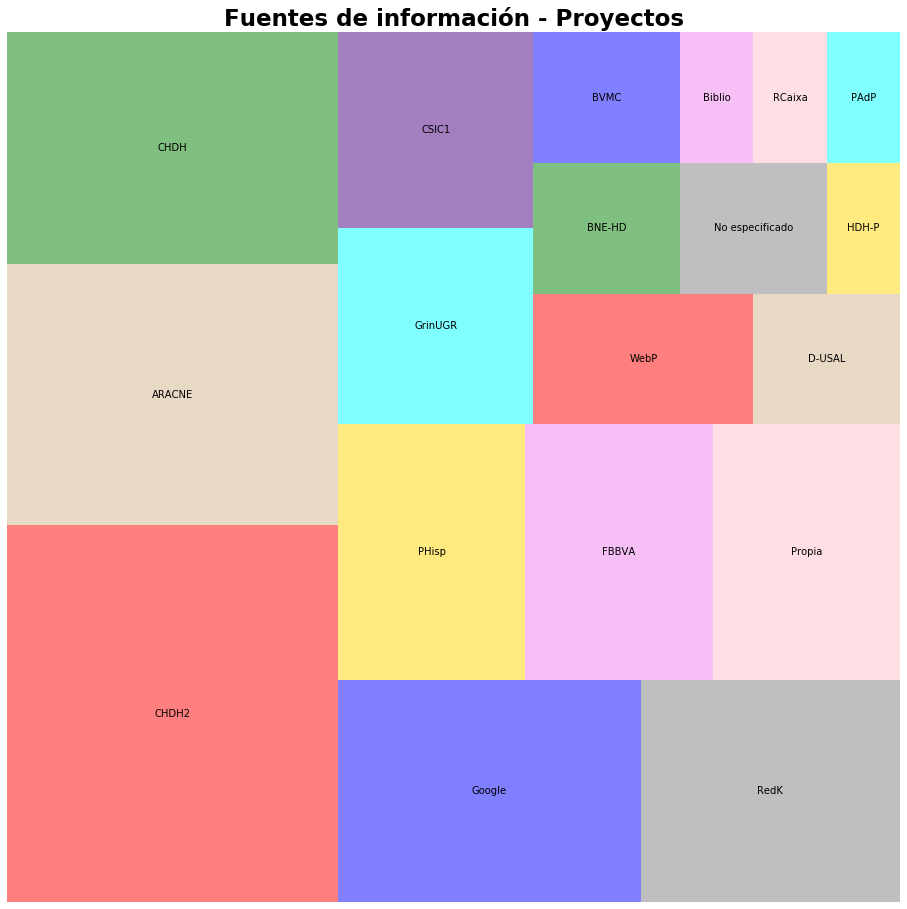

In [26]:
#Create our plot and resize it.
fig = plt.gcf()
ax = fig.add_subplot()
fig.set_size_inches(16, 16)
colors = ["red", "tan", "green", "blue", "grey", "gold", "violet", "pink", "cyan", "indigo"]
squarify.plot(sizes=corrected_dict.values(), label=corrected_dict.keys(), color=colors, alpha=.5, text_kwargs={'fontsize':10})
plt.title("Fuentes de información - Proyectos",fontsize=23,fontweight="bold")

plt.axis('off')
plt.show() 

# Print table

In [27]:
sources_table = pd.DataFrame.from_dict(sources_dict, orient='index')
sources_table

,0
CONGRESO INTERNACIONAL HUMANIDADES DIGITALES: VISIBILIDAD Y DIFUSIÓN DE LA INVESTIGACIÓN,13
ARACNE,9
Congresos Humanidades Digitales Hispánicas,8
Google,7
Red Knowmetrics,6
Portal del Hispanismo,5
Fundación BBVA,5
Fuente propia,5
GrinUGR,4
I Jornada científico-técnica en Humanidades Digitales en el CSIC,4
